In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

In [3]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1 = 0.00001313983               # m/s 
    A2 = 0.00002593650               # m/s
    g1 = 1
    g2 = 1.43
    kb = 160                         # m3/sec
    b = 0.19
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f= 5*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,600)
num_points_0=600
initialConditions = [0, 0, 0, 0,0.6213]
sol = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

Text(0, 0.5, 'Concentration')

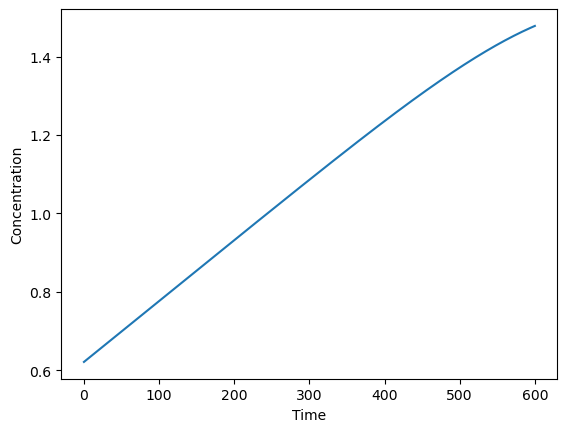

In [3]:
plt.plot(sol.t,sol.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, '0,0 Moment')

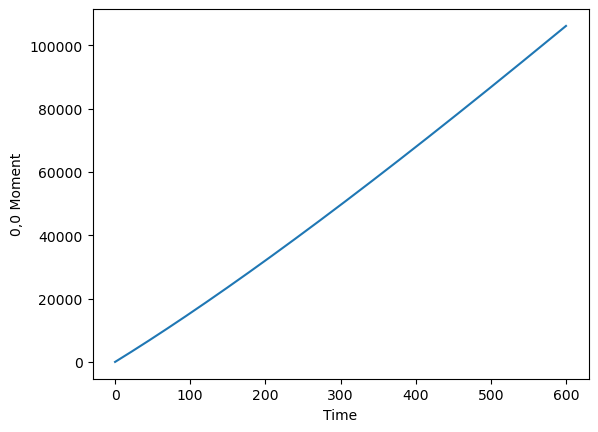

In [4]:
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

In [5]:
def generateODE1(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1=0.001000009302753984
    g1=1.0000000012073436
    A2= 0.001
    g2= 1.4300000002543005
    kb=2.9999999991968114
    b=0.19000000134239053
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B - (m00/tau)
    dm10=(Gl*m00)-(m10/tau)
    dm01=(Gw*m00)-(m01/tau)
    dm11=(Gl*m10)+(Gw*m01)-(m11/tau)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(c/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,11400)
num_points=11400
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE1(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

Text(0, 0.5, 'Concentration')

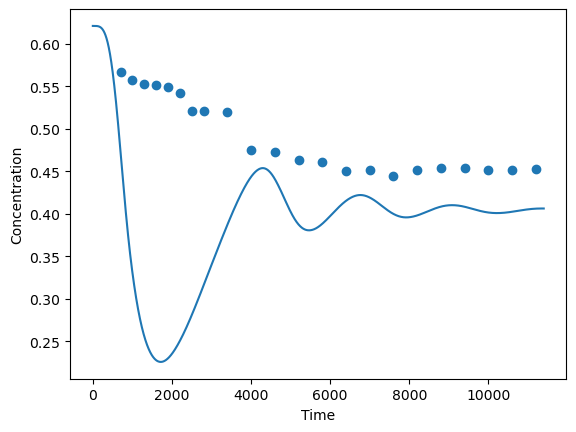

In [6]:
Time = np.array([700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3400, 4000, 4600, 5200, 5800, 6400, 7000, 7600, 8200, 8800, 9400, 10000, 10600,11200])
Concentration = np.array([0.567100911,0.55806661,0.552402276,0.551438362,0.549870445,0.542640664,0.520739187,0.520630394,0.519500363,0.475518394,0.472627019,0.463479808,0.46155871,0.450828366,0.451514849,0.444370262,0.451795351,0.453523969,0.453676045,0.452259622,0.451143698,0.453071627])
plt.scatter(Time,Concentration)
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, '0,0 Moment')

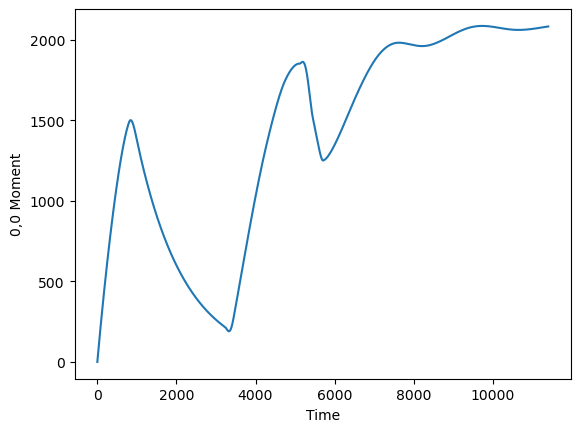

In [7]:
plt.plot(sol1.t,sol1.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

Text(0, 0.5, '0,0 Moment')

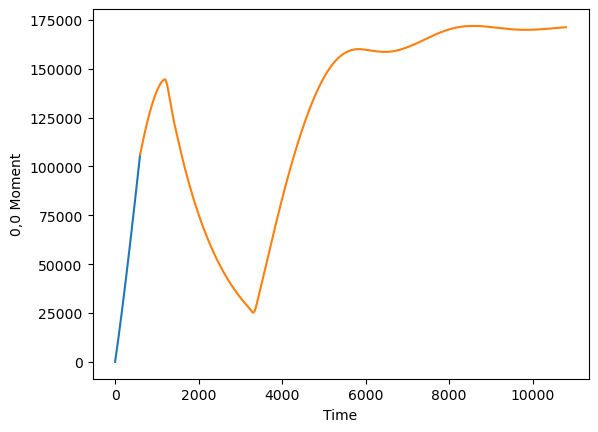

In [8]:
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")
plt.plot(sol1.t,sol1.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

Text(0, 0.5, 'Concentration')

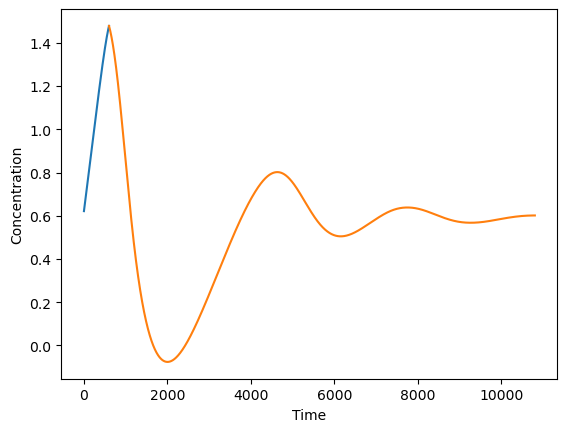

In [9]:
plt.plot(sol.t,sol.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

In [ ]:
[0.567100911,0.55806661,0.552402276,0.551438362,0.549870445,0.542640664,0.520739187,0.520630394,0.519500363,0.475518394,0.472627019,0.463479808,0.46155871,0.450828366,0.451514849,0.444370262,0.451795351,0.453523969,0.453676045,0.452259622,0.451143698,0.453071627]

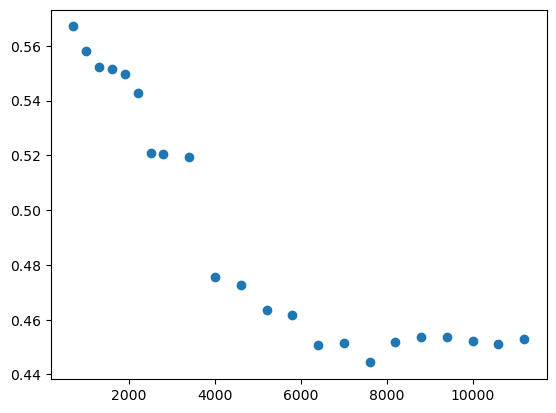

In [19]:
Time = [700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3400, 4000, 4600, 5200, 5800, 6400, 7000, 7600, 8200, 8800, 9400, 10000, 10600,11200]
Concentration1 = [0.567100911, 0.55806661, 0.552402276, 0.551438362, 0.549870445,0.542640664, 0.520739187, 0.520630394, 0.519500363, 0.475518394,0.472627019, 0.463479808, 0.458483942, 0.450828365, 0.445943248,0.444370262, 0.443307854, 0.441843768, 0.441817087, 0.44552464,0.445840537]
Concentration=[0.567100911,0.55806661,0.552402276,0.551438362,0.549870445,0.542640664,0.520739187,0.520630394,0.519500363,0.475518394,0.472627019,0.463479808,0.46155871,0.450828366,0.451514849,0.444370262,0.451795351,0.453523969,0.453676045,0.452259622,0.451143698,0.453071627]
#len(Concentration)
plt.scatter(Time,Concentration)

C:\Users\heman\AppData\Local\Temp\ipykernel_15580\4261942360.py:32: RuntimeWarning: divide by zero encountered in scalar power
  Gw = A2 * (s)**g2
C:\Users\heman\anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:109: RuntimeWarning: invalid value encountered in divide
  return norm(self._estimate_error(K, h) / scale)
C:\Users\heman\AppData\Local\Temp\ipykernel_15580\4261942360.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
C:\Users\heman\AppData\Local\Temp\ipykernel_15580\4261942360.py:37: RuntimeWarning: invalid value encountered in scalar subtract
  dm01 = (Gw * m00) - (m01 / tau)
C:\Users\heman\AppData\Local\Temp\ipykernel_15580\4261942360.py:38: RuntimeWarning: invalid value encountered in scalar multiply
  dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)


Optimized Parameters:
A1: 2.1939156607920454e-05
g1: 1.0032805860017215
A2: 2.387501928004067e-05
g2: -0.2798190090847983
kb: 326.8598185902424
b: 0.15837089981985275


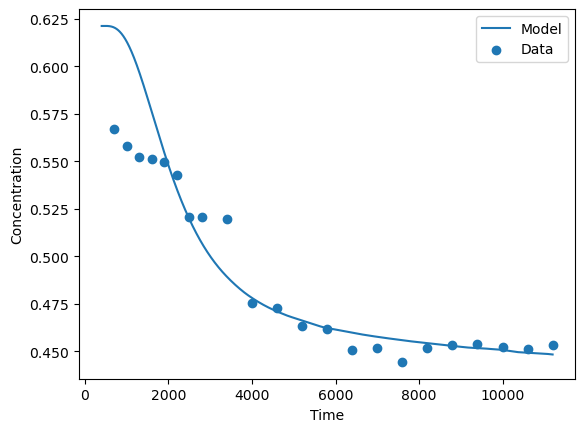

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time = np.array([700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3400, 4000, 4600, 5200, 5800, 6400, 7000, 7600, 8200, 8800, 9400, 10000, 10600,11200])
Concentration = np.array([0.567100911,0.55806661,0.552402276,0.551438362,0.549870445,0.542640664,0.520739187,0.520630394,0.519500363,0.475518394,0.472627019,0.463479808,0.46155871,0.450828366,0.451514849,0.444370262,0.451795351,0.453523969,0.453676045,0.452259622,0.451143698,0.453071627])

def generateODE2(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    f = 5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002                        # Volume, adjust as needed
    t_span = (400, 10600)               # Adjust this to match the maximum time in your data
    num_points = 10600
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE2(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4], bounds_error=False, fill_value="extrapolate")
    model_predictions = interp_solution(Time)
    error = np.sum((model_predictions - Concentration)**2)  # Sum of squared differences
    return error

# Initial guess for parameters
initial_guess = [0.00001313983, 1, 0.00002593650, 1.43, 160, 0.19]

# Minimize the objective function
result = minimize(objective, initial_guess, method='Nelder-mead')

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

# Plot the optimized model against the data
t_span = (400, 11200)
num_points = 11200
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE2(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

In [3]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1 = 6.3068*10**(-5)              # m/s 
    A2 = 2.00*10**(-5)        # m/s
    g1 = 1.84
    g2 = -0.88399
    kb = 295.94                         # m3/sec
    b = 1.1067
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f= 5*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,400)
num_points_0= 400
initialConditions = [0, 0, 0, 0,0.6213]
sol1= solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

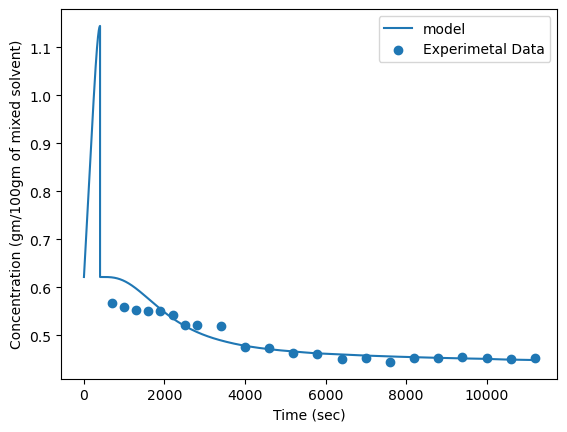

In [4]:
plt.plot(np.append(sol1.t,sol.t),np.append(sol1.y[4], sol.y[4]), label ="model")
plt.scatter(Time, Concentration, label='Experimetal Data')
plt.xlabel("Time (sec)")
plt.ylabel("Concentration (gm/100gm of mixed solvent)")
plt.legend()
plt.show()